

*   load data
*   split the data into train and test sets
*   build the network architecture
*   compile network
*   train network



In [ ]:
!pip install tensorflow

In [62]:
!pip install ujson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.2 MB/s eta 0:00:00


In [66]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from matplotlib import pyplot as plt

In [68]:
## data loader

def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

  ## convert list into numpy arrays
  inputs = np.array(data["mfcc"])
  targets = np.array(data["labels"])

  return inputs, targets


In [82]:
### we have data of 10 music of eacch genre
### and each audio file is segment into 10 segments- so each data : 3 sec long

DATASET_PATH = "/content/data.json"
if __name__ =="__main__":

  ## load data
  inputs, targets = load_data(DATASET_PATH)

  ## split data into train and test sets
  inputs_train , inputs_test, targets_train, targets_test = train_test_split(
      inputs, targets, test_size=0.3
  )

In [83]:
  ### building the network architecture

model = keras.Sequential([
    ## input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    ## flatten the 2D array : mfccs for each segment tracks and each traccks we have many mfccs vectors
    ## each mfccs is taken at certain intervals- hop length
    ## first dimension : intervals , 2nd dimension : values of  mfcc -1 mfcc

    ## first hidden layer
    ## adding dropout layers to all hidden layers
    ## also adding a Regularization
    keras.layers.Dense(512, activation="relu", kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    ## second hidden layer
    keras.layers.Dense(256, activation="relu", kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    ## third hidden layer
    keras.layers.Dense(64, activation="relu", kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    ## output layer
    ## 10 neuron as we have 10 genere
    ## softmax - normalize the output , picks the neuron with highest value
    keras.layers.Dense(10, activation="softmax")

  ])

## compile network

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [84]:
## train network

history = model.fit(inputs_train,targets_train,
          validation_data=(inputs_test, targets_test),
          epochs = 50,
          batch_size=32
          )

Epoch 1/50
22/22 [==============================] - 2s 30ms/step - loss: 59.2471 - accuracy: 0.1232 - val_loss: 10.7354 - val_accuracy: 0.1733
Epoch 2/50
22/22 [==============================] - 0s 20ms/step - loss: 28.7717 - accuracy: 0.1332 - val_loss: 6.5130 - val_accuracy: 0.2467
Epoch 3/50
22/22 [==============================] - 0s 19ms/step - loss: 20.4279 - accuracy: 0.1648 - val_loss: 4.5475 - val_accuracy: 0.2267
Epoch 4/50
22/22 [==============================] - 0s 19ms/step - loss: 15.8325 - accuracy: 0.1762 - val_loss: 4.0712 - val_accuracy: 0.2100
Epoch 5/50
22/22 [==============================] - 1s 25ms/step - loss: 13.5952 - accuracy: 0.1848 - val_loss: 3.7959 - val_accuracy: 0.2000
Epoch 6/50
22/22 [==============================] - 1s 28ms/step - loss: 11.3226 - accuracy: 0.1905 - val_loss: 3.6219 - val_accuracy: 0.2400
Epoch 7/50
22/22 [==============================] - 1s 27ms/step - loss: 10.7031 - accuracy: 0.1805 - val_loss: 3.4782 - val_accuracy: 0.2100
Epoch

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

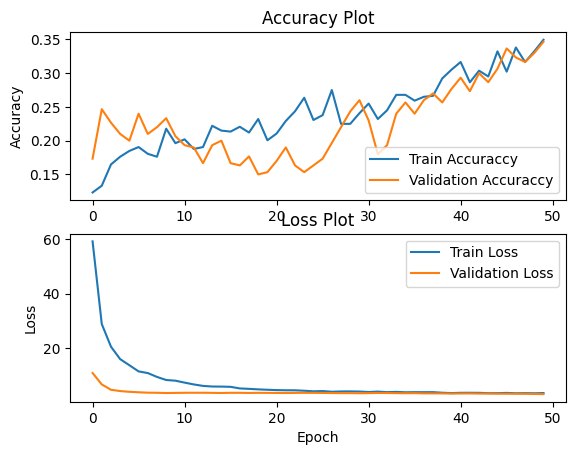

In [85]:
def plot_history(history):
  fig, axs = plt.subplots(2)

  ##create accuracy sub-plot
  axs[0].plot(history.history["accuracy"], label="Train Accuraccy")
  axs[0].plot(history.history["val_accuracy"], label="Validation Accuraccy")
  axs[0].set_ylabel("Accuracy")
  # axs[0].set_xlabel("Epoch")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy Plot")

  ##create loss sub-plot
  axs[1].plot(history.history["loss"], label="Train Loss")
  axs[1].plot(history.history["val_loss"], label="Validation Loss")
  axs[1].set_ylabel("Loss")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Loss Plot")

  plt.show()

plot_history(history)


In [ ]:
### we conclude that our model is over fitting as it is unable to genearlize un seen data of validation

### and we solve it using l2 regularization and dropout